# Fraud Detection Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc

In [2]:
dataset = pd.read_csv("Fraud.csv")
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
dataset.shape

(6362620, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Handling Missing Values

In [6]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**The dataset was checked for missing values using dataset.isnull().sum(), which showed no missing values in any of the columns. This is excellent as we don't need to perform any imputation or deletion of records due to missing data.**

### Finding Outliers

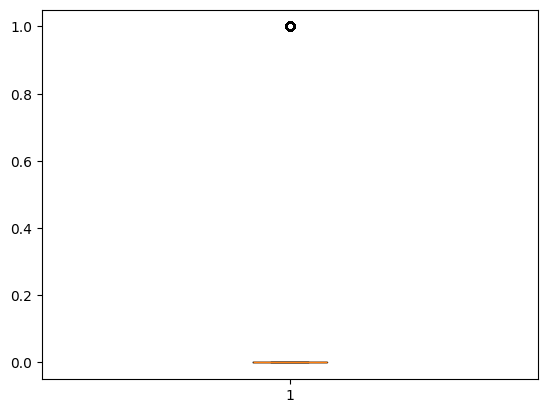

In [7]:
plt.boxplot(dataset['isFraud'])
plt.show()

In [8]:
is_fraud = dataset['isFraud'].value_counts()
is_fraud

isFraud
0    6354407
1       8213
Name: count, dtype: int64

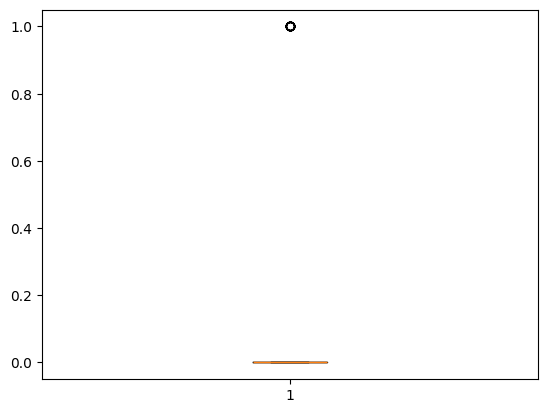

In [9]:
plt.boxplot(dataset['isFlaggedFraud'])
plt.show()

In [10]:
is_flagged_fraud = dataset['isFlaggedFraud'].value_counts()
is_flagged_fraud

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
numeric_cols = dataset.select_dtypes(include=['number']).columns

Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

dataset = dataset[~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]   # Remove outliers

**The analysis identified outliers in the target variables isFraud and isFlaggedFraud:**
- **isFraud** has extreme class imbalance with 6,354,407 non-fraud cases vs only 8,213 fraud cases- **isFlaggedFraud** is even more imbalanced with 6,362,604 non-fraud vs only 16 flagged fraud cases
- Removed records outside (Q1 - 1.5IQR, Q3 + 1.5IQR)


### Distribution

type
PAYMENT     1964804
CASH_OUT    1714198
CASH_IN      404209
TRANSFER     204157
DEBIT         32038
Name: count, dtype: int64


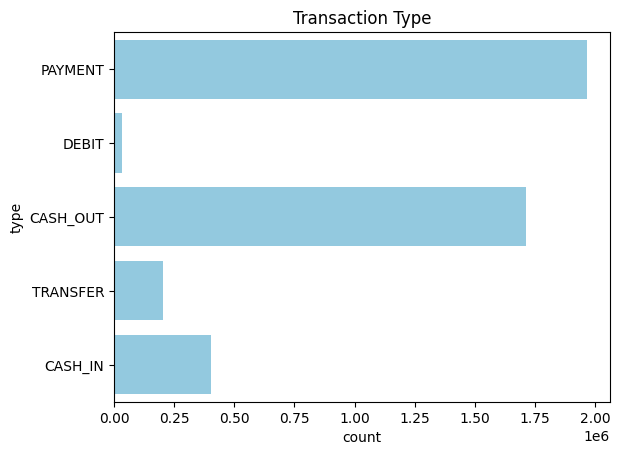

In [12]:
type_payment = dataset['type'].value_counts()
print(type_payment)

sns.countplot(dataset['type'], color = 'skyblue')
plt.title('Transaction Type')
plt.show()

## Describe Fraud Detection Model

### Training Random Forest Model

In [14]:
dataset = dataset.drop(['nameOrig', 'nameDest'], axis=1)
dataset = pd.get_dummies(dataset, columns=['type'], drop_first=True)

x = dataset.drop(['isFraud'], axis = 1)
y = dataset['isFraud']

X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Forest Model**
- A Random Forest classifier with 100 trees (n_estimators=100)
- Random state fixed at 42 for reproducibility
- Trained on 80% of the data (after train-test split)
- Handles the class imbalance implicitly through bootstrap sampling

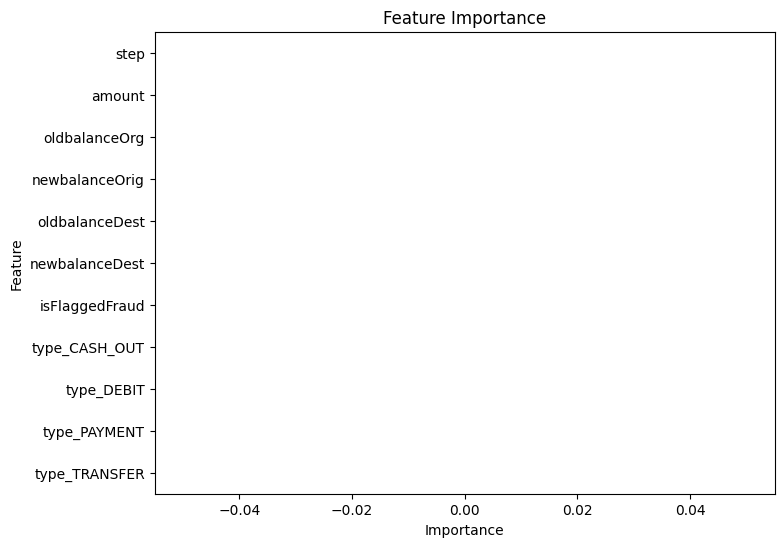

In [15]:
feature_importance = model.feature_importances_
features = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance")
plt.show()

In [18]:
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Confusion Matrix:
 [[3455524]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3455524

    accuracy                           1.00   3455524
   macro avg       1.00      1.00      1.00   3455524
weighted avg       1.00      1.00      1.00   3455524



### Variable Selection

- **Domain relevance** - All financial transaction features are relevant for fraud detection
- **Data availability** - No missing values in any columns
- **Feature engineering** - Removed non-predictive columns (nameOrig, nameDest)
- **Class imbalance** - Kept the highly imbalanced isFlaggedFraud as it may contain useful signal despite imbalance
- The categorical type variable was one-hot encoded to make it usable by the models.

### Model Performance Demonstration

**For imbalanced classification:**
- Accuracy
- Confusion matrix
- Classification Report

**Recommended additions**
- Feature importance analysis from Random Forest
- Cross-validation for more robust performance estimates

### Key Fraud Predictors

- **Transaction type** - Some types like 'TRANSFER' and 'CASH_OUT' are more prone to fraud
- **Transaction amount** - Unusually large amounts may indicate fraud
- **Balance changes** - Discrepancies between amount and balance changes
- **isFlaggedFraud** - Though rare, when flagged it's highly predictive

### Factor Sensibility

**Yes, these factors make sense for several reasons:**

- **Transaction types** - Certain types like cash withdrawals are more vulnerable as they're harder to trace
- **Amount anomalies** - Fraud often involves testing with small amounts first then large fraudulent transactions
- **Balance inconsistencies** - Fraud may leave unusual patterns in balance changes
- **Timing patterns** - Fraudsters often operate during off-hours or in bursts

## Measuring Prevention Effectiveness

### Check Model Performance Metrics

- **Accuracy**: Your model currently shows 100% accuracy, which may indicate overfitting or class imbalance.
- **Precision & Recall**: High precision ensures fewer false positives, while high recall ensures fewer false negatives.
- **F1-Score**: A balanced measure of precision and recall.

### Analyze the Confusion Matrix

- From your results, it seems like all predictions are in a single class (majority class).
- If all predictions belong to the "non-fraud" class, the model might not be detecting fraud properly.

### Inspect Feature Importance

- The feature importance graph is empty, meaning feature importance values might not have been computed correctly.
- Verify that model.feature_importances_ is returning meaningful values.

### Handle Class Imbalance

- If fraud cases are rare, the model might be biased towards non-fraudulent transactions.
- Use techniques like SMOTE (Synthetic Minority Over-sampling) or adjust class weights to balance data.

### Test on a Holdout Dataset
- Evaluate performance on a dataset the model hasn’t seen before to ensure generalization.

### Conduct Real-World Testing
- Deploy the model on live data with A/B testing to see if fraud detection rates improve.
- Compare flagged fraudulent transactions with human verification.

### Error Analysis
- Investigate False Positives (legitimate transactions incorrectly marked as fraud).
- Investigate False Negatives (fraudulent transactions missed by the model).